# PCA no dataset iris

PCA é umas das técnicas mais usadas atualmente para realizar a redução de dimensionalidade, permitindo que haja uma melhor visualização dos dados assim como uma melhora nos algoritmos de aprendizado de máquina. Assim, ao longo deste notebook iremos mostrar como construir um algoritmo PCA do zero e depois verificar como ficou o novo espaço de dados.

Iremos trabalhar com o dataset iris:

https://archive.ics.uci.edu/ml/datasets/iris

Referência:

https://plot.ly/ipython-notebooks/principal-component-analysis/

In [1]:
#Import's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Read file
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']  
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,names=columns)

In [3]:
#Extract features
features = iris.drop('class',1)

In [4]:
class PCA:
    
    def __init__(self,k=None):
        self.k = k
        self.explained_variance_ratio_ = []
    
    def fit_transform(self,X):
        #Standardize data
        features = StandardScaler().fit_transform(X)
    
        #Covariance matrix
        cov_features = np.cov(features.T)
    
        #Eigenvalues and eigenvectors
        eig_vals, eig_vecs = np.linalg.eig(cov_features)
        
        #Computes the percentage of each eig_vals
        tot = np.sum(eig_vals)
        self.explained_variance_ratio_ = [i/tot for i in eig_vals]
    
        # Make a list of (eigenvalue, eigenvector) tuples
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

        # Sort the (eigenvalue, eigenvector) tuples from high to low
        eig_pairs.sort(reverse=True)
        
        #Check if has the k top vectors to choose
        if(self.k == None):
            self.k = len(eig_pairs)
        
        #Create matrix w
        w = np.array([]).reshape(4,0)
        for i in range(self.k):
            w = np.concatenate((w,eig_pairs[i][1].reshape(4,1)),axis=1)
    
        #Project data
        return features.dot(w)

In [5]:
#Apply pca in data
p = PCA().fit_transform(features)

#Create a dataframe with new data
principalDf = pd.DataFrame(data=p,columns=['pc1','pc2','pc3','pc4'])

#Concat with class
finalDf = pd.concat([principalDf,iris['class']],axis=1)

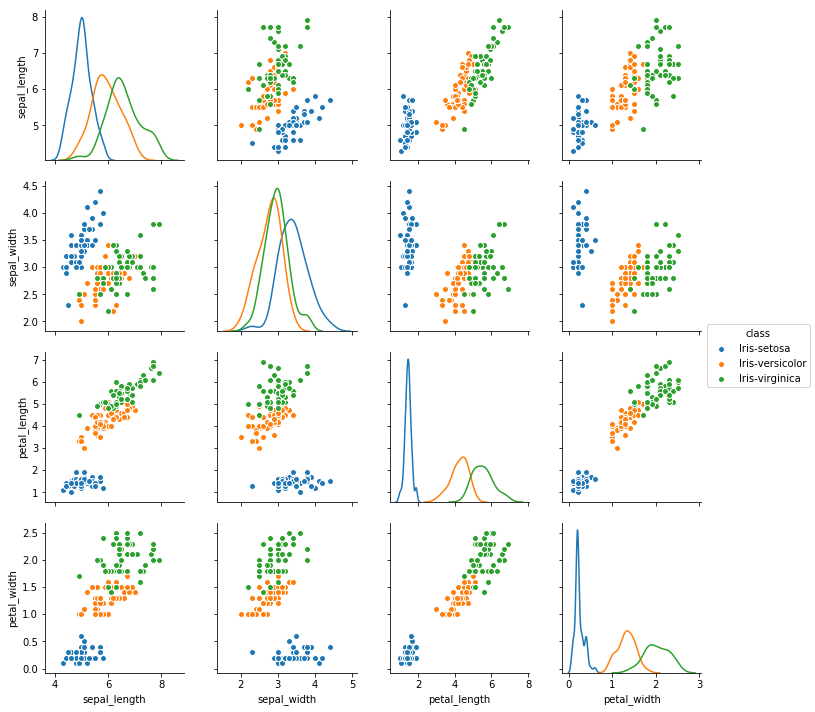

In [6]:
#Show the old space
sns.pairplot(data=iris,hue='class',diag_kind='kde')
plt.show()

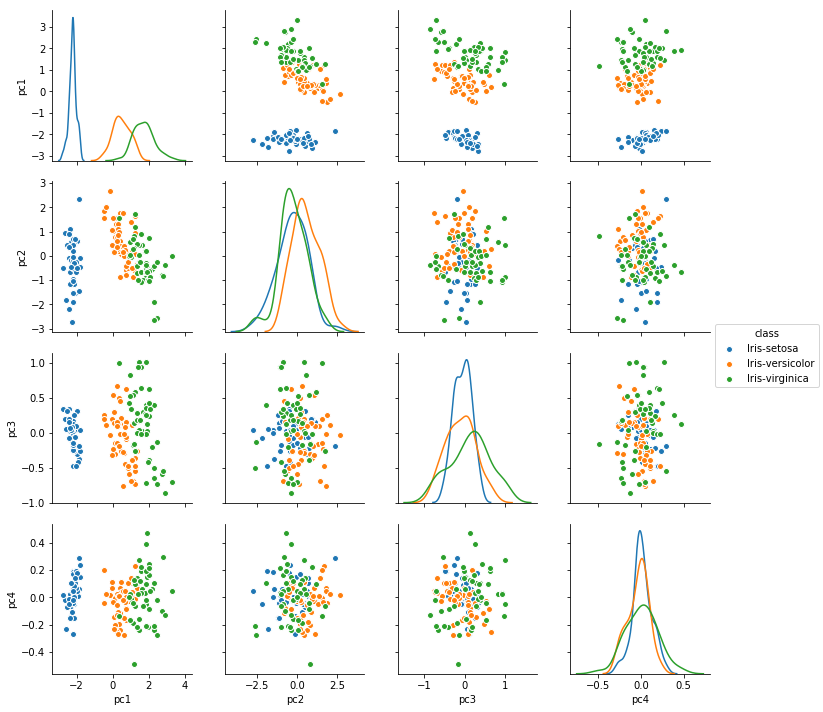

In [7]:
#Show the new space
sns.pairplot(data=finalDf,hue='class',diag_kind='kde')
plt.show()

Comparando os dois gráficos vemos que há uma grande mudança no espaço de dados. Note que no novo espaço gerado nós temos gráficos que misturam todas as classes, como ocorre em pc3 vs pc2, fato que não ocorria no antigo espaço.

Apesar disso, se voce focar no gráfico entre pc1 vs pc2 verá que as classes estão muito bem separadas e que apenas estes dois novos atributos poderíam ser utilizados para uma classificação. 

## Conclusão

A utilização do PCA permitiu uma melhor separação no espaço de dados. Isso fez com que apenas os dois primeiros componentes principais fossem o suficiente para realizar uma futura classificação assim como, apenas ambos poderiam ser utilizados para visualização.